In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Linear Regression

### Code Example 1

In [3]:
data = pd.read_csv('poly_data.csv')

rows, cols = data.shape

print("Data has {} rows with  {} columns".format(rows, cols))
data.head()

Data has 60 rows with  2 columns


,y,x
0,1.065763,1.047198
1,1.006086,1.117011
2,0.695374,1.186824
3,0.949799,1.256637
4,1.063496,1.326450


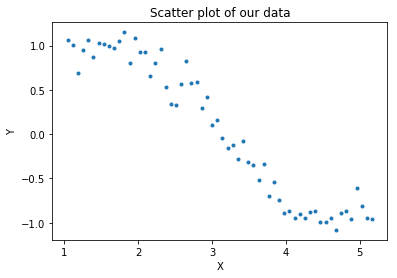

In [4]:
# Separate the data into features and response.
predictors = ['x']
response = ['y']
# Visualize the data
plt.plot(data[predictors], data[response], '.')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of our data')
plt.show()

### Example 3

Model MSE: 0.05467192664907911


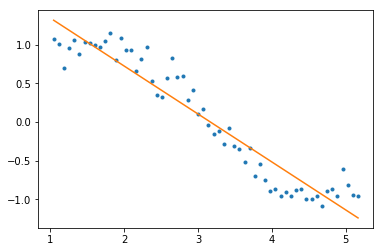

In [5]:
# Lets fit a linear regression model to this data
from sklearn.linear_model import LinearRegression

lr1 = LinearRegression(normalize=True)
lr1.fit(data[predictors], data[response])
y_pred = lr1.predict(data[predictors])
#Evaluate our model with mean square error
mse1 = np.mean((y_pred - data[response])**2)
print("Model MSE: {}".format(mse1[0]))
plt.plot(data['x'], data['y'], '.', data['x'], y_pred, '-')
plt.show()

In [6]:
#We are going to add columns to our exiting data frame

#To generate a name starting with a character and ending with a number, lets try this:
print("x_%d"%5)

x_5


In [7]:
for i in range(2,6):
   colname = "x_%d"%i
   data[colname] = data.x**i

data.head()

,y,x,x_2,x_3,x_4,x_5
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339


Model MSE: 0.01697622659290198


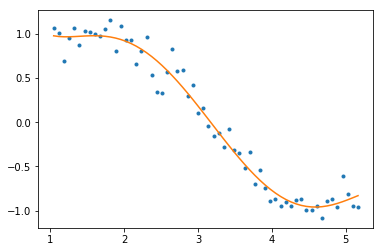

In [8]:
predictors = data.columns.values[1:]
lr2 = LinearRegression(normalize=True)
lr2.fit(data[predictors], data[response])
y_pred2 = lr2.predict(data[predictors])

#Evaluate our model with mean square error
mse2 = np.mean((y_pred2 - data[response])**2)
print("Model MSE: {}".format(mse2[0]))

plt.plot(data['x'], data['y'], '.', data['x'], y_pred2, '-')
plt.show()

In [9]:
print(lr2.coef_)

[[-5.11776235  4.72461232 -1.92856217  0.33473526 -0.02065326]]


### Overfitting model

In [10]:
for i in range(2,16):
   colname = "x_%d"%i
   data[colname] = data.x**i

data.head()

,y,x,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.065763,1.047198,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.006086,1.117011,1.247713,1.393709,1.556788,1.738948,1.942424,2.169708,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,0.695374,1.186824,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,0.949799,1.256637,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819709,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.063496,1.326450,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


Model MSE: y    0.011747
dtype: float64


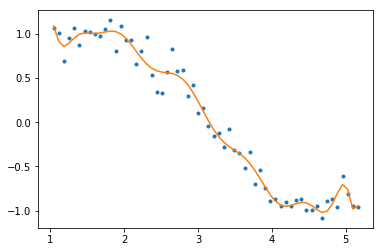

In [11]:
predictors = data.columns.values[1:]
lr3 = LinearRegression(normalize=True)
lr3.fit(data[predictors], data[response])
y_pred3 = lr3.predict(data[predictors])

#Evaluate our model with mean square error
mse3 = np.mean((y_pred3 - data[response])**2)
print("Model MSE: {}".format(mse3))
plt.plot(data['x'], data['y'], '.', data['x'], y_pred3, '-')
plt.show()

In [12]:
print(lr3.coef_)

[[ 2.43864630e+05 -7.45890723e+05  1.37625844e+06 -1.71376098e+06
   1.52625011e+06 -1.00483194e+06  4.98319398e+05 -1.87823641e+05
   5.38482876e+04 -1.16569499e+04  1.87285551e+03 -2.16368876e+02
   1.69840881e+01 -8.10686503e-01  1.77533627e-02]]


In [13]:
print("MSE Simple LR: {}".format(mse1[0]))
print("MSE Polynomial LR with power = 3:  {}".format(mse2[0]))
print("MSE Polynomial LR with power = 15: {}".format(mse3[0]))

MSE Simple LR: 0.05467192664907911
MSE Polynomial LR with power = 3:  0.01697622659290198
MSE Polynomial LR with power = 15: 0.011746977503401212


In [15]:
print("Coefficients Simple LR: {}".format(lr1.coef_))
print()
print("Coefficients Polynomial LR with power = 3:  {}".format(lr2.coef_))
print()
print("Coefficients Polynomial LR with power = 15: {}".format(lr3.coef_))

Coefficients Simple LR: [[-0.61957457]]

Coefficients Polynomial LR with power = 3:  [[-5.11776235  4.72461232 -1.92856217  0.33473526 -0.02065326]]

Coefficients Polynomial LR with power = 15: [[ 2.43864630e+05 -7.45890723e+05  1.37625844e+06 -1.71376098e+06
   1.52625011e+06 -1.00483194e+06  4.98319398e+05 -1.87823641e+05
   5.38482876e+04 -1.16569499e+04  1.87285551e+03 -2.16368876e+02
   1.69840881e+01 -8.10686503e-01  1.77533627e-02]]


### Fix overfitting issue - Ridge regression (shrink the coefficients)

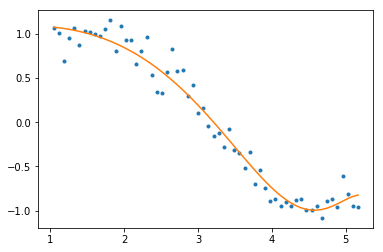


Model MSE: 0.018916257918692937

Model Coeff: [[ 1.21303173e-01 -6.94156079e-02 -1.57127609e-02 -2.22135504e-03
  -1.87641517e-04  9.20231813e-06  8.64853953e-06  2.50183053e-06
   5.43898711e-07  9.86145333e-08  1.46765431e-08  1.46917382e-09
  -6.50509217e-11 -9.35906282e-11 -3.58880160e-11]]


In [16]:
from sklearn.linear_model import Ridge

#call the ridge regression model with penalty (lambda) = 0.003
ridgelr = Ridge(alpha=0.003, normalize=True) # change lambda value here

#Fit our data
ridgelr.fit(data[predictors], data[response])

# Do a prediction
y_pred4 = ridgelr.predict(data[predictors])

#Evaluate our model with mean square error
mse4 = np.mean((y_pred4 - data[response])**2)
plt.plot(data['x'], data['y'], '.', data['x'], y_pred4, '-')
plt.show()
print()
print("Model MSE: {}".format(mse4[0]))
print()
print("Model Coeff: {}".format(ridgelr.coef_))


### Fix Overfitting - Lasso (shrink coefficients then choose few import coeffiecents and drop others)

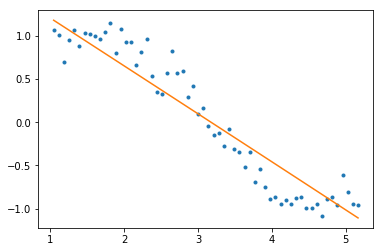


Model MSE: 0.060651189731085776

Model Coeff: [-0.55206563 -0.00056232 -0.         -0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.          0.        ]


In [17]:
from sklearn.linear_model import Lasso

#call the lasso regression model with penalty (alpha) = 0.01
# we also specify the max number of iterations as 10^5
lassoreg = Lasso(alpha=0.01,normalize=True, max_iter=1e5) # change lambda value here

#Fit our data
lassoreg.fit(data[predictors], data[response])

# Do a prediction
y_pred5 = lassoreg.predict(data[predictors])

#Evaluate our model with mean square error
mse5 = np.mean((y_pred5 - data['y'])**2)

plt.plot(data['x'], data['y'], '.', data['x'], y_pred5, '-')
plt.show()
print()
print ("Model MSE: {}".format(mse5))
print()
print("Model Coeff: {}".format(lassoreg.coef_))

## Regularised Logistic Regression

### Code Example 1

In [21]:
exam_data = pd.read_csv('ExamScores.csv')

rows, cols = exam_data.shape
print("Data has: {} rows and {} cols".format(rows, cols))

exam_data.head()

Data has: 100 rows and 3 cols


,Exam1,Exam2,Admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Code Example 2

In [20]:
from sklearn.model_selection import train_test_split

Dtrain,Dtest = train_test_split(exam_data, test_size=0.3)

print(Dtrain.shape)
print(Dtest.shape)

(70, 3)
(30, 3)


### Code Example 3

In [22]:
predictors = ['Exam1', 'Exam2']
response = ['Admit']

print(Dtrain[predictors].head())
print()
print(Dtest[predictors].head())

        Exam1      Exam2
87  75.477702  90.424539
53  34.524514  60.396342
73  60.457886  73.094998
69  66.746719  60.991394
89  52.348004  60.769505

        Exam1      Exam2
22  50.534788  48.855812
36  33.915500  98.869436
52  90.546714  43.390602
77  50.458160  75.809860
59  71.796462  78.453562


### Code Example 4

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lambda_val = 0.1
#Initialize the Logitic regression model with l2 penalty
lr = LogisticRegression(C=1/lambda_val, penalty='l2',solver='lbfgs')
lr.fit(Dtrain[predictors], Dtrain['Admit'])
y_predict = lr.predict(Dtest[predictors])


In [26]:
#Evaluate our model
model_acc = accuracy_score(y_predict, Dtest['Admit'])
print("Model Accuracy is: {}".format(model_acc))

print("Model Coeff: {}".format(np.append(lr.intercept_, lr.coef_)))


Model Accuracy is: 0.8666666666666667
Model Coeff: [-10.02562425   0.07617954   0.08889457]


### Code example 5

In [60]:
def runLRmodel(trials, data, predictors, label, penalty_type, penalty_score):

    model_acc     = 0
    model_weights = np.zeros([1,3])

    for i in range(0,trials):
        Dtrain, Dtest = train_test_split(data, test_size=0.3)
        lr = LogisticRegression(C=1/penalty_score, penalty='l2',solver='lbfgs')
        lr.fit(Dtrain[predictors], Dtrain[label])
        y_predict = lr.predict(Dtest[predictors])
        model_acc += accuracy_score(y_predict, Dtest[label])
        model_weights += np.append(lr.intercept_, lr.coef_)

        model_acc /= trials
        model_weights /= trials

    return np.round(model_acc, decimals=2), np.round(model_weights,decimals=2)

In [1]:
predictors = ('f1','f2')

In [61]:
lambda_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l2_acc = np.zeros(len(lambda_vals))
index = 0
#L2 regularization
for l in lambda_vals:
    l2_acc[index], w = runLRmodel(500,exam_data, predictors, 'Admit', 'l2', np.float(l))
    index += 1

print("Acc: {}".format(l2_acc))
# penalty at which validation accuracy is maximum
max_index_l2  = np.argmax(l2_acc)
best_lambda = lambda_vals[max_index_l2]
print("Best Lambda: {}".format(best_lambda))

Acc: [0.89 0.89 0.89 0.88 0.89 0.89 0.89 0.89 0.89 0.89 0.89 0.88]
Best Lambda: 0.0001


### Code Example 7

In [62]:
alpha_vals = [.0001,.0003,.001,.003,.01,.03,.1,.3,1,3,5,10]
l1_acc = np.zeros(len(alpha_vals))
index = 0
#L2 regularization
for l in alpha_vals:
    l1_acc[index], w = runLRmodel(500,exam_data, predictors, 'Admit', 'l1', np.float(l))
    index += 1

In [63]:
print("Acc: {}".format(l1_acc))
# penalty at which validation accuracy is maximum
max_index_l1  = np.argmax(l1_acc)
best_alpha = alpha_vals[max_index_l1]
print("Best Alpha: {}".format(best_alpha))

Acc: [0.89 0.88 0.89 0.89 0.89 0.89 0.89 0.88 0.89 0.89 0.89 0.89]
Best Alpha: 0.0001


In [4]:
#plot the accuracy curve
plt.plot(range(0,len(lambda_vals)), l2_acc, color='b', label='L2')
plt.plot(range(0,len(lambda_vals)), l1_acc, color='r', label='L1')
#replace the x-axis labels with penalty values
plt.xticks(range(0,len(lambda_vals)), lambda_vals, rotation='vertical')

#Highlight the best values of alpha and lambda
plt.plot((max_index_l2, max_index_l2), (0, l2_acc[max_index_l2]), ls='dotted', color='b')
plt.plot((max_index_l1, max_index_l1), (0, l1_acc[max_index_l1]), ls='dotted', color='r')

#Set the y-axis from 0 to 1.0
axes = plt.gca()
axes.set_ylim([0, 1.0])

plt.legend(loc="lower left")
plt.show()

NameError: name 'lambda_vals' is not defined

In [2]:
from sklearn.linear_model import SGDRegressor # this implements Elastic net regression model
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

data = pd.read_csv('poly_data.csv')
# Separate the data into features and response.
predictors = ['x']
response = ['y']

alpha_val = 0.1

Dtrain, Dtest = train_test_split(data, test_size=0.3)
enet = SGDRegressor(loss='squared_loss', penalty='elasticnet', alpha=alpha_val, l1_ratio=0.7, max_iter=1000) 

enet.fit(Dtrain[predictors],Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
y_predict = enet.predict(Dtest[predictors])
y_predict = np.reshape(y_predict, np.shape(Dtest[response]))
mse2 = np.mean((y_predict - Dtest[response])**2)

print("Model MSE: {}".format(mse2[0]))

NameError: name 'pd' is not defined

In [3]:
from sklearn.linear_model import SGDClassifier # this implements Elastic net classification model
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

alpha_val = 0.1

exam_data = pd.read_csv('ExamScores.csv')
predictors = ['Exam1', 'Exam2']
response = ['Admit']

Dtrain, Dtest = train_test_split(exam_data, test_size=0.3)
enet = SGDClassifier(loss='log', penalty='elasticnet', alpha=alpha_val, l1_ratio=0.7, max_iter=1000) 
enet.fit(Dtrain[predictors], Dtrain[response].values.reshape((Dtrain[response].shape[0],)))
y_predict = enet.predict(Dtest[predictors])
enet_acc = accuracy_score(y_predict, Dtest[response])

print("Acc: {}".format(enet_acc))


NameError: name 'train_test_split' is not defined

In [2]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib inline

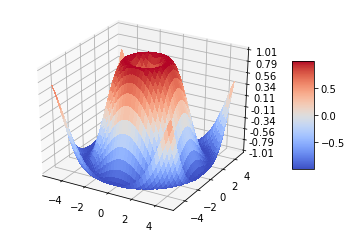

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [64]:
Z

array([[ 0.70886129,  0.57562789,  0.42921793, ...,  0.27541086,
         0.42921793,  0.57562789],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       ...,
       [ 0.27541086,  0.09046523, -0.09334004, ..., -0.26940744,
        -0.09334004,  0.09046523],
       [ 0.42921793,  0.2570234 ,  0.08068791, ..., -0.09334004,
         0.08068791,  0.2570234 ],
       [ 0.57562789,  0.4208019 ,  0.2570234 , ...,  0.09046523,
         0.2570234 ,  0.4208019 ]])

In [43]:
## help(np.meshgrid)

In [44]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

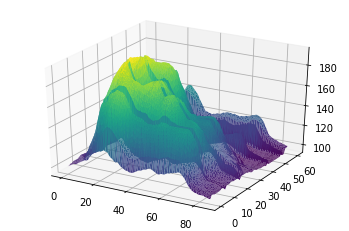

In [45]:
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()


In [60]:
a = [1,2,3,3,4,5]
a = np.array(a)
z = np.zeros((len(a),len(a)))
z[:] = a
z

array([[1., 2., 3., 3., 4., 5.],
       [1., 2., 3., 3., 4., 5.],
       [1., 2., 3., 3., 4., 5.],
       [1., 2., 3., 3., 4., 5.],
       [1., 2., 3., 3., 4., 5.],
       [1., 2., 3., 3., 4., 5.]])

In [75]:
z

array([[ 10.        ,   9.99496542,   9.97986676, ...,  -9.97986676,
         -9.99496542, -10.        ],
       [ 10.        ,   9.99496542,   9.97986676, ...,  -9.97986676,
         -9.99496542, -10.        ],
       [ 10.        ,   9.99496542,   9.97986676, ...,  -9.97986676,
         -9.99496542, -10.        ],
       ...,
       [ 10.        ,   9.99496542,   9.97986676, ...,  -9.97986676,
         -9.99496542, -10.        ],
       [ 10.        ,   9.99496542,   9.97986676, ...,  -9.97986676,
         -9.99496542, -10.        ],
       [ 10.        ,   9.99496542,   9.97986676, ...,  -9.97986676,
         -9.99496542, -10.        ]])

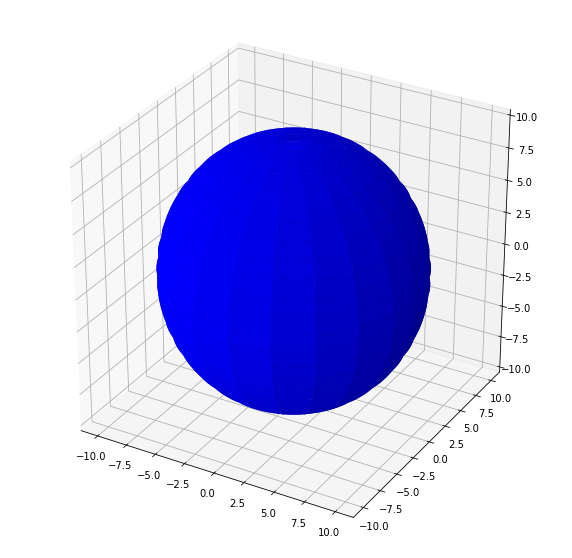

In [70]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection = '3d')

u = np.linspace(0, 2* np.pi, 100)
v = np.linspace(0, np.pi, 100)

x = 10 * np.outer(np.cos(u),np.sin(v))
y = 10 * np.outer(np.sin(u),np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))
ax.plot_surface(x,y,z, rstride =5, cstride = 4, color ='b')

plt.show()